# Determine Word to PCA Associations

This notebook is designed to check if there is a bug for the PCA plots. Turns out there isn't a bug the signal captured in the first two components is quite strong.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotnine as p9
from sklearn.decomposition import PCA
from tqdm import tqdm_notebook

In [2]:
journal_map_df = pd.read_csv("../exploratory_data_analysis/output/biorxiv_article_metadata.tsv", sep="\t")
journal_map_df.head()

,author_type,heading,category,document,doi
0,regular article,new results,genetics,440735_v1.xml,10.1101/440735
1,regular article,new results,systems biology,775270_v1.xml,10.1101/775270
2,regular article,new results,genetics,242404_v1.xml,10.1101/242404
3,regular article,new results,neuroscience,872994_v1.xml,10.1101/2019.12.11.872994
4,regular article,new results,developmental biology,080853_v2.xml,10.1101/080853


# PCA the Documents

Run PCA over the documents. Generates 50 principal components, but can generate more or less.

In [3]:
n_components = 2
random_state = 100

In [4]:
biorxiv_articles_dict = {
    150: pd.read_csv("../word_vector_experiment/output/word2vec_output/biorxiv_all_articles_150.tsv.xz", sep="\t"),
    250: pd.read_csv("../word_vector_experiment/output/word2vec_output/biorxiv_all_articles_250.tsv.xz", sep="\t"),
    300: pd.read_csv("../word_vector_experiment/output/word2vec_output/biorxiv_all_articles_300.tsv.xz", sep="\t")
}

In [5]:
biorxiv_articles_dict[150].shape

(97952, 151)

In [6]:
biorxiv_articles_dict[250].shape

(97952, 251)

In [7]:
biorxiv_articles_dict[300].shape

(97952, 301)

In [10]:
pca_dict = {}
for embedding_dim in biorxiv_articles_dict:
    
    reducer = PCA(
        n_components = n_components,
        random_state = random_state
    )

    embedding = reducer.fit_transform(
        biorxiv_articles_dict[embedding_dim][[f"feat_{idx}" for idx in range(embedding_dim)]].values
    )

    pca_dict[embedding_dim] = (
        pd.DataFrame(embedding, columns=[f"pca{dim}" for dim in range(1, n_components+1, 1)])
        .assign(document=biorxiv_articles_dict[embedding_dim].document.values.tolist())
        .merge(journal_map_df[["category", "document", "doi"]], on="document")
    )

# PCA Embedding Check

In [11]:
pca_dict[150].head(3)

,pca1,pca2,document,category,doi
0,2.602809,1.508622,440735_v1.xml,genetics,10.1101/440735
1,2.293428,-0.024677,775270_v1.xml,systems biology,10.1101/775270
2,3.918582,1.754447,242404_v1.xml,genetics,10.1101/242404


In [12]:
pca_dict[250].head(3)

,pca1,pca2,document,category,doi
0,2.520755,1.577992,440735_v1.xml,genetics,10.1101/440735
1,2.272005,-0.025756,775270_v1.xml,systems biology,10.1101/775270
2,3.856144,1.778623,242404_v1.xml,genetics,10.1101/242404


In [13]:
pca_dict[300].head(3)

,pca1,pca2,document,category,doi
0,2.513123,1.586051,440735_v1.xml,genetics,10.1101/440735
1,2.274446,-0.021502,775270_v1.xml,systems biology,10.1101/775270
2,3.846039,1.811592,242404_v1.xml,genetics,10.1101/242404


# PCA Plots

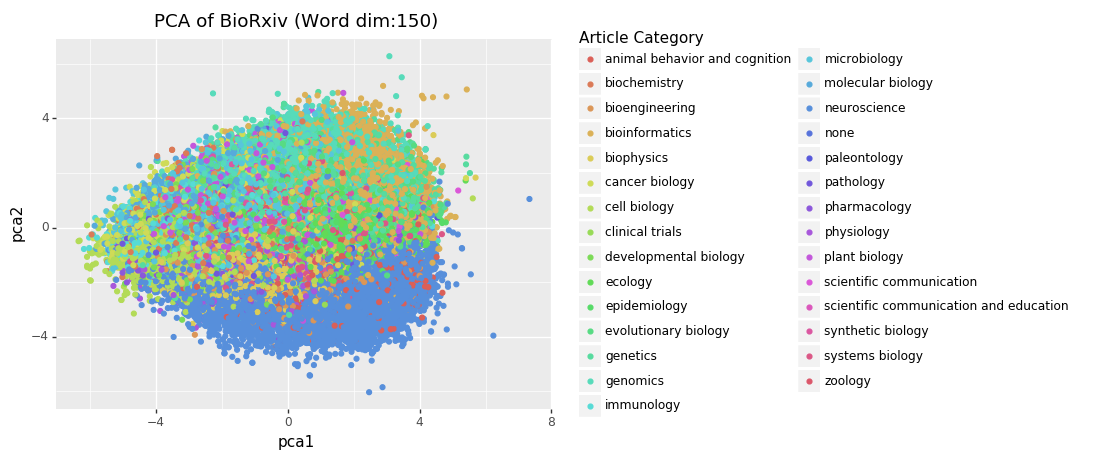

<ggplot: (-9223363244734508484)>


In [14]:
g = (
    p9.ggplot(pca_dict[150])
    + p9.aes(x="pca1", y="pca2", color="factor(category)")
    + p9.geom_point()
    + p9.labs(
        title="PCA of BioRxiv (Word dim:150)",
        color="Article Category"
    )
)
print(g)

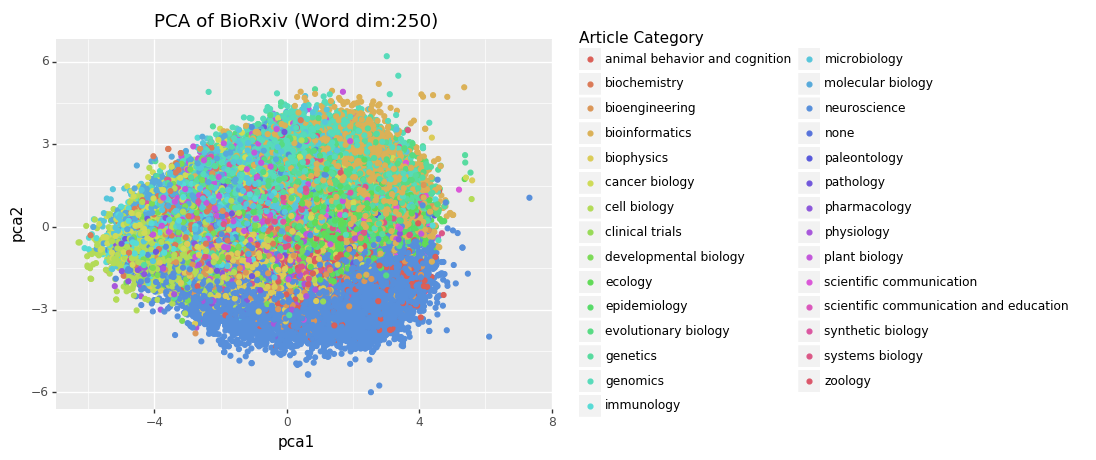

<ggplot: (8792121467291)>


In [15]:
g = (
    p9.ggplot(pca_dict[250])
    + p9.aes(x="pca1", y="pca2", color="factor(category)")
    + p9.geom_point()
    + p9.labs(
        title="PCA of BioRxiv (Word dim:250)",
        color="Article Category"
    )
)
print(g)

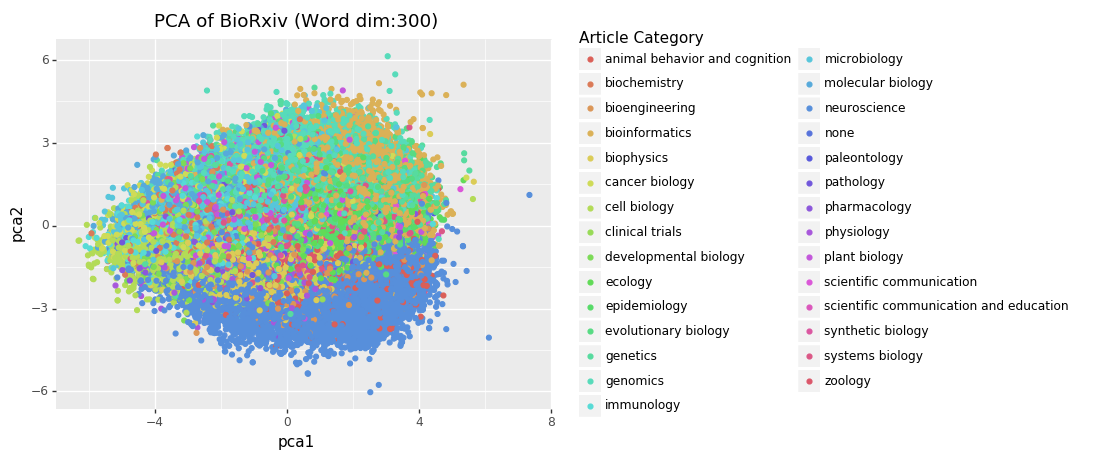

<ggplot: (-9223363244734860323)>


In [16]:
g = (
    p9.ggplot(pca_dict[300])
    + p9.aes(x="pca1", y="pca2", color="factor(category)")
    + p9.geom_point()
    + p9.labs(
        title="PCA of BioRxiv (Word dim:300)",
        color="Article Category"
    )
)
print(g)